Let's generate N time discrete series, each consisting of T observations of a random variable X.

We'll consider a triangular-distributed random variable, $$X\sim Tr([0,1]).$$
                    

In [78]:
# Check python version
import sys
print("Python is:", sys.version)

# Import matplotlib and numpy
import matplotlib
import matplotlib.pyplot as plt
print("Matplotlib is:", matplotlib.__version__)

import numpy as np
print("numpy is:", np.__version__)

import random

%matplotlib inline

Python is: 3.6.6 |Anaconda custom (64-bit)| (default, Jun 28 2018, 11:07:29) 
[GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)]
Matplotlib is: 2.1.0
numpy is: 1.13.3


In [79]:
N=5000
T=10

x_min=0
x_max=1

X=np.zeros((N,T))

for i in range(0,N):
    for j in range(0,T):
        X[i][j]=np.random.triangular(x_min,(x_min+x_max)/2,x_max)

Next, we

1. bin the range [0,1] into 10 intervals of width 0.1, and count observations in each bin, for each of the N time series.

2. compute the cumulative number of all events smaller than the upper end of each bin, for each of the N time series.

3. estimate the uncertainty in this number as the standard deviation over all all time series.

4. construct the cumulative decision weight $F_w$ by adding, for one time series (the 0th one), the uncertainty in the count, and then normalize.

In [80]:
n=np.zeros((N,10))

for series in range(0,N):
    for obs in range(0,T):
        n[series][int(10*X[series][obs])]=n[series][int(10*X[series][obs])]+1
        
cumulative=np.cumsum(n,1)
uncertainty=np.std(cumulative,0)

Fw=np.zeros(11)
for i in range(0,10):
#    Fw[i+1]=cumulative[0][i]+uncertainty[i]
#    Fw[i+1]=np.mean(cumulative,0)[i]+uncertainty[i]
    Fw[i+1]=np.median(cumulative,0)[i]+uncertainty[i]
 
Fw=Fw/Fw[-1]

Finally, we display the resulting ``probability weighting,'' in the usual way and recover the inverse-S curve... or do we?

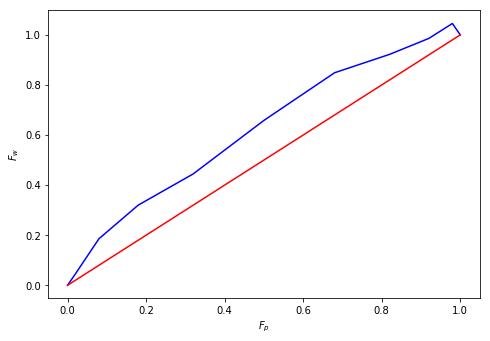

In [81]:
Fp=np.zeros(11)
i=0
for x in np.arange(0.1,1.01,.1):
    if i<5:
        Fp[i+1]=Fp[i]+.1*(4*x+4*(x-.1))/2
    else:
        Fp[i+1]=Fp[i]+.1*(4-4*x+4-4*(x-.1))/2
    i=i+1
    
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(Fp,Fw,'b',label='')
ax.plot(Fp,Fp,'r',label='')
ax.legend()
ax.set_xlabel(r'$F_p$')
ax.set_ylabel(r'$F_w$')
plt.show() 

In [82]:
Fw

array([ 0.        ,  0.04531454,  0.18581375,  0.32007811,  0.44477231,
        0.65832875,  0.84873138,  0.92212578,  0.98580851,  1.04541948,  1.        ])

In [83]:
Fp

array([ 0.  ,  0.02,  0.08,  0.18,  0.32,  0.5 ,  0.68,  0.82,  0.92,
        0.98,  1.  ])